**Chapter 4 – Training Models**

# Source

## Hands-On Machine Learning
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media. Kindle Edition.</I><br>
https://github.com/ageron/handson-ml2<br>

## Data Science School
https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html?highlight=normal%20equation

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Overview

## 모델을 훈련시키는 2가지 방법
1. 직접 계산할 수 있는 공식(정규방정식: Normal Equation)을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(= 훈련 세트에 대해 비용함수를 최소화하는 모델 파라미터)를 해석적으로 도출
2. 경사 하강법(Gradient Descent)를 이용하여 모델의 파라미터를 조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화시키는 방법:
- 배치 경사 하강법(Batch Gradient Descent)
- 미내배치 경사 하강법(Mini-Batch Gradient Descent)
- 확률적 경사 하강법(Stochastic Gradient Descent)

## Polynomial Regression (다항 회귀)

# Linear Regression (선형 회귀)

## 선형회귀분석의 기초

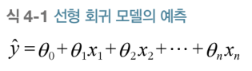

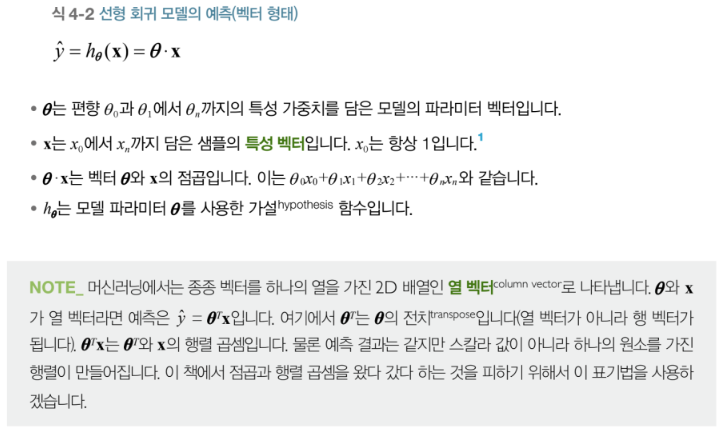

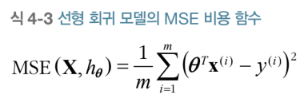

## The Normal Equation (정규방정식)

X, y가 주어졌을 때, 비용함수를 최소화하는 θ값을 찾기 위한 해석적인 방법은 아래와 같은 정규방정식을 이용하는 것이다.

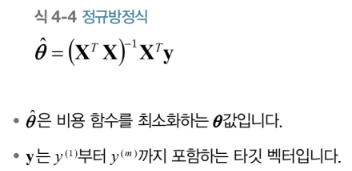

이에 대한 증명은 아래의 페이지를 참고:<br>
https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares#Derivation_of_the_normal_equations

In [2]:
# 모형의 학습을 위해 가상의 선형 데이터 생성: 난수를 이용하여 noise 추가
# 즉, 선형 회귀 모델인 y = 4 + 3x 에 에러(noise)가 추가된 형태
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# 생성된 변수를 확인.
np.c_[X, y][:10]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995],
       [0.31198904, 5.29307969],
       [0.11616722, 5.82639572],
       [1.73235229, 8.67878666],
       [1.20223002, 6.79819647],
       [1.41614516, 7.74667842]])

Saving figure generated_data_plot


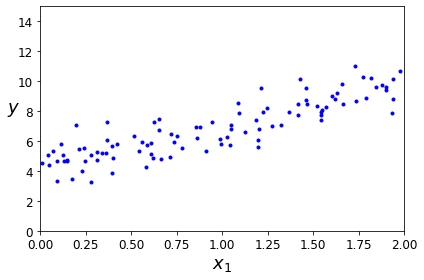

In [4]:
# X, y를 plot
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [5]:
# 선형모형에 상수항(x0=1)을 추가.
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# 상수항이 추가된 X를 확인.
np.c_[X, X_b][:10]

array([[0.74908024, 1.        , 0.74908024],
       [1.90142861, 1.        , 1.90142861],
       [1.46398788, 1.        , 1.46398788],
       [1.19731697, 1.        , 1.19731697],
       [0.31203728, 1.        , 0.31203728],
       [0.31198904, 1.        , 0.31198904],
       [0.11616722, 1.        , 0.11616722],
       [1.73235229, 1.        , 1.73235229],
       [1.20223002, 1.        , 1.20223002],
       [1.41614516, 1.        , 1.41614516]])

### 정규방정식을 이용하여 선형회귀모형 구하기**

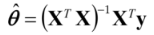

In [6]:
# 식4-4의 정규방정식을 python 코드로 옮기면 아래와 같이 theta_hat을 구할 수 있음.
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  
theta_hat

array([[4.21509616],
       [2.77011339]])

In [7]:
# 새로운 X값에 대해 y를 예측.
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [8]:
X_new

array([[0],
       [2]])

In [9]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [10]:
# 4와 3을 기대했지만, noise로 인해 오차 발생
theta_hat

array([[4.21509616],
       [2.77011339]])

In [11]:
# theta_hat을 사용하여 예측 시행.
y_predict = X_new_b.dot(theta_hat)
y_predict

array([[4.21509616],
       [9.75532293]])

In [12]:
np.c_[X, y][:10]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995],
       [0.31198904, 5.29307969],
       [0.11616722, 5.82639572],
       [1.73235229, 8.67878666],
       [1.20223002, 6.79819647],
       [1.41614516, 7.74667842]])

Saving figure linear_model_predictions_plot


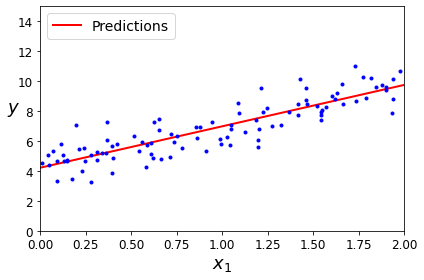

In [13]:
# 모델의 예측을 데이터와 함께 그래프로 표시.
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

### 사이킷런을 이용하여 선형회귀모형 구하기: SVD (Sigular Vector Decomposition)

In [14]:
# 사이킷런에서 간단하게 선형 회귀를 수행할 수 있음.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Gradient Descent (경사 하강법)

- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘.<br>
- 비용함수를 최소화하기 위해 반복해서 파라미터를 조정하는 방법으로 학습 진행.<br>
- θ를 임의의 값(무작위 초기화 방법으로)에서 시작하여 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 최솟값에 수렴할 때까지 점진적으로 학습을 반복.<br>

선형회귀 모델의 경우 RMSE를 최소화하는 θ를 찾는 것이 목표.<br>
RMSE가 최솟값을 가질 때 MSE도 최솟값을 가지며, MSE를 최소화하는 θ를 구하는 것이 더 쉽기 때문에 비용함수로 사용됨.<br>

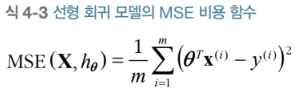

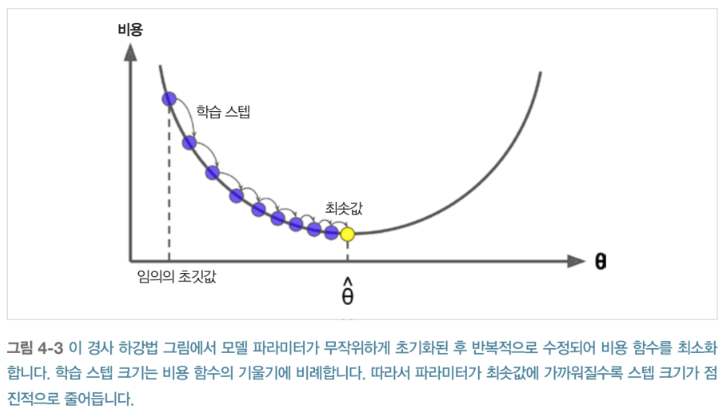

학습 스텝 = 학습률 * 기울기

학습률이 너무 작은 경우, 모형이 수렴하기 위해 과도한 시간이 소요됨.

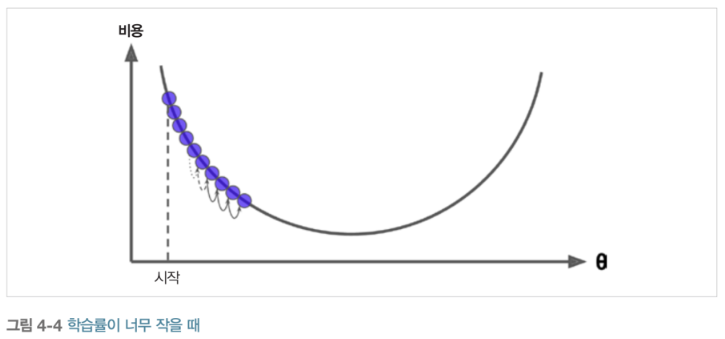

학습률이 너무 큰 경우, 모형이 수렴하지 못하는 상황이 발생할 수 있음.

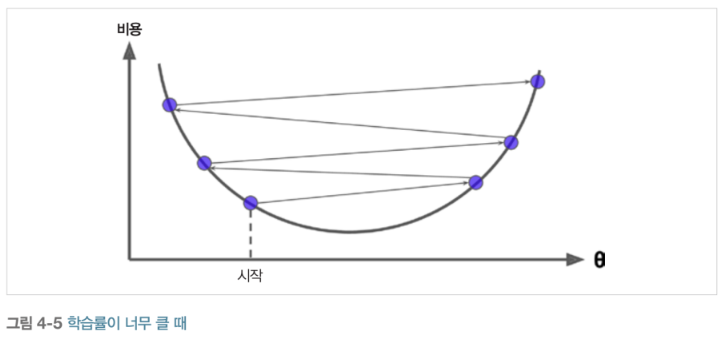

경사 하강법의 문제점: 비용함수의 모양에 따라서는 전역 최솟값(Global Minimum)이 아닌 지역 최솟값(Local Minimum)에 수렴할 수도 있음.

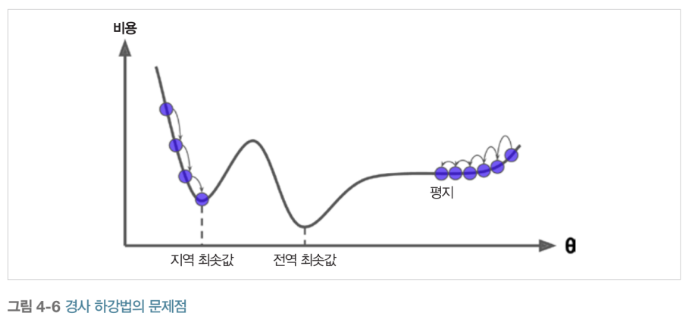

경사 하강법을 사용할 때, Scaler를 사용하여 모든 특성이 동일한 스케일을 갖도로 해야 수렴에 걸리는 시간이 단축될 수 있음.<br>
아래의 그림에서 동심원은 동일한 비용을 연결하여 작성되며, 동심원의 중심은 전역 최솟값에 해당하는 $θ(θ_1, θ_2)$<br>
비용이 감소하는 방향으로 $θ(θ_1, θ_2)$가 움직이기 위해서는 동심원의 접선에 수직인 방향으로 진행해야 함.<br>
왼쪽 그림보다 오른쪽 그림에서 더 동선이 길어지는 것은 수렴에 소요되는 시간이 길어지는 것을 의미.

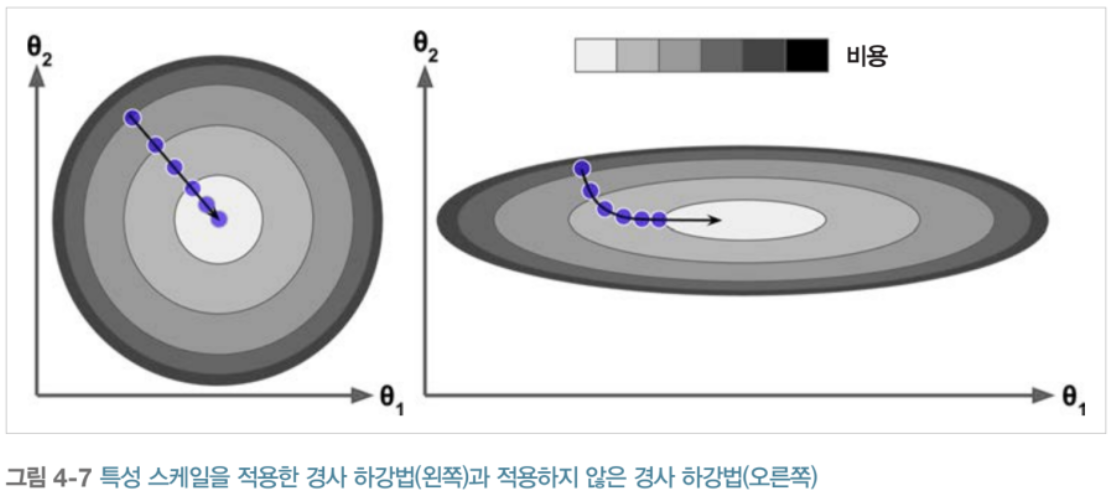

## Batch Gradient Descent (배치 경사 하강법)

- 각 모델 파라미터 $θ_j$에 대해 비용함수의 그레이디언트(기울기)를 계산.
- 전체 훈련 세트 X에 대해 아래의 공식을 적용.
- 매우 큰 훈련 세트에 대해 낮은 속도를 보임. (배치 경사 하강법의 경우. 대신, 다른 종류의 경사 하강법을 사용함으로써 해결.)
- 경사 하강법은 특성 수에 민감하지 않아, 특성 수가 매우 많은 경우(수십만 개), 빠른 속도를 보임.

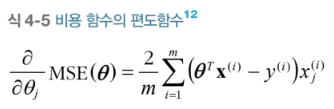

<center>m: 인스턴스 갯수</center>

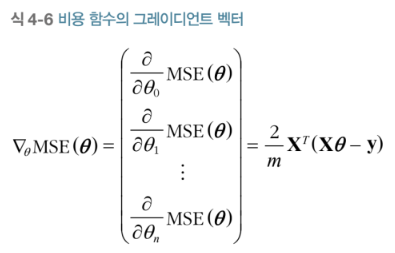

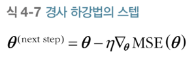

<center>η (eta): 학습률</center>

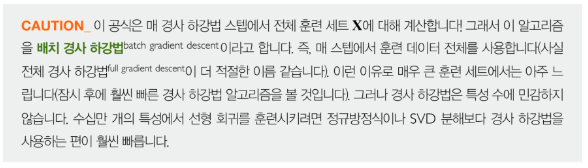

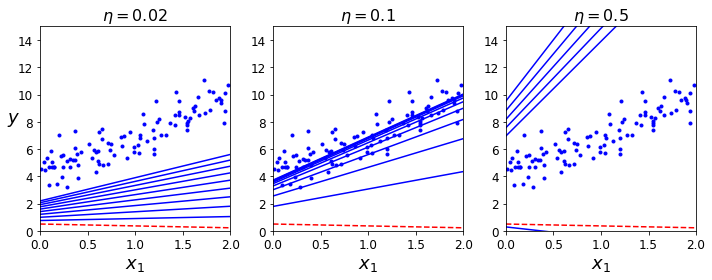

## Stochastic Gradient Descent (확률적 경사 하강법)

- 훈련 샘플을 무작위로 선택하고 그에 대한 그레이디언트를 계산하는 방식.
- 그림 4-6처럼 비용함수가 불규칙한 경우 알고리즘이 지역 최솟값을 건너뛸 수 있다는 장점을 가짐.
- 전역 최솟값에 수렴이 되기 힘든 단점을 가짐.
- (지역 최솟값에 빠지지 않도록)시작 시에 학습률을 크게 하고, 점진적으로 학습률을 낮추는 방법으로 전역 최솟값에 수렴.

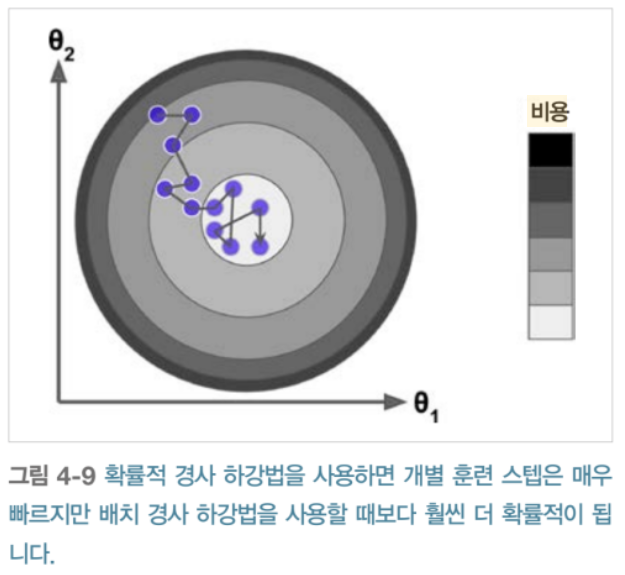

* 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에(한 번에 하나의 샘플을 처리) 알고리즘의 속도가 빠름.<br>
* 반면, 데이터의 선택이 확률적(무작위)이기 때문에 불안정. 즉, 최솟값에 다다르기까지 비용함수는 위아래로 크게 요동치며 변화.<br>
* 무작위성으로 인해 최솟값에 다다르지 못할 수 있는 단점은 학습률의 점진적 감소로 해결.

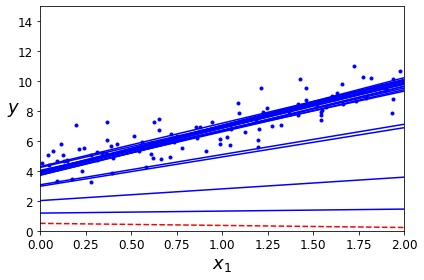

In [16]:
# 확률적 경사 하강법을 적용한 회귀모형
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42, verbose=1)
#sgd_reg.fit(X, y)
sgd_reg.fit(X, y.ravel())  # y를 열벡터(column-vector)에서 1차원 배열로 변환

-- Epoch 1
Norm: 3.24, NNZs: 1, Bias: 3.723972, T: 100, Avg. loss: 1.360878
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.03, NNZs: 1, Bias: 3.874357, T: 200, Avg. loss: 0.447488
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.95, NNZs: 1, Bias: 4.007925, T: 300, Avg. loss: 0.422661
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.00, NNZs: 1, Bias: 4.142345, T: 400, Avg. loss: 0.419309
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.86, NNZs: 1, Bias: 4.105497, T: 500, Avg. loss: 0.425072
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.96, NNZs: 1, Bias: 4.258580, T: 600, Avg. loss: 0.409378
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.91, NNZs: 1, Bias: 4.223245, T: 700, Avg. loss: 0.416350
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.83, NNZs: 1, Bias: 4.200587, T: 800, Avg. loss: 0.418950
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.78, NNZs: 1, Bias: 4.179650, T: 900, Avg. loss: 0.417705
Total training time: 0.00 seconds.
-

SGDRegressor(eta0=0.1, penalty=None, random_state=42, verbose=1)

In [17]:
# y과 y.ravel()의 차이는?
y.shape, y.ravel().shape

((100, 1), (100,))

##### numpy.ndarray.ravel
method
ndarray.ravel([order])<br>
Return a flattened array.<br>
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html?highlight=numpy%20ndarray<br>

##### sklearn.linear_model.SGDRegressor
class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)<br>
Linear model fitted by minimizing a regularized empirical loss with SGD.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html?highlight=sgdregressor#sklearn.linear_model.SGDRegressor<br>

<b>learning_rate: str, default=’invscaling’</b><br>
The learning rate schedule:<br>
‘constant’: eta = eta0<br>
‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.<br>
‘invscaling’: eta = eta0 / pow(t, power_t)<br>
‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.<br>

In [18]:
# 학습된 선형회귀모형의 계수를 확인
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

In [19]:
sgd_reg.score(X, y)

0.7671282467701365

## Mini-batch Gradient Descent (미니배치 경사 하강법)

각 스텝에서 전체 훈련 세트나 하나의 샘플을 사용하지 않고, 미니배치라 불리는 임의의 작은 샘플 세트로 학습을 진행.<br>
행렬 연산에 최적화된 하드웨어(GPU)를 사용함으로써 큰 성능의 향상을 기대할 수 있음.<br>

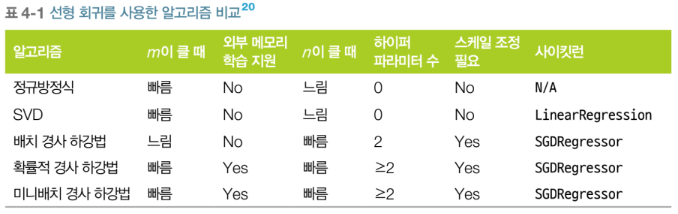

# Polynomial Regression (다항 회귀)

- 단순한 직선보다 복잡한 형태의 데이터를 학습하는 데 사용되는 모형.
- 각 특성의 n제곱 형태의 새로운 특성을 추가한 선형 모형을 학습.

In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [21]:
# 학습용 데이터를 생성: 2차항(X^2) 포함
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


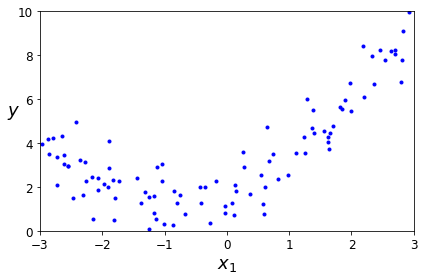

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [23]:
# 2차 항을 추가하여 다항식을 생성.
from sklearn.preprocessing import PolynomialFeatures  # Transformer Class
poly_features = PolynomialFeatures(degree=2, include_bias=False)  # 기본이 2차식이며, include_bias=True인 경우 x0 추가
X_poly = poly_features.fit_transform(X)
poly_features.get_feature_names_out()  # 생성된 특성명을 모두 확인

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'

##### sklearn.preprocessing.PolynomialFeatures
class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')<br>
<u>Generate polynomial and interaction features.</u><br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures<br>

In [ ]:
X[0]

In [ ]:
X_poly[0]  # x0, x0^2의 항이 생성됨을 확인

In [ ]:
# 다항이 포함된 X(X_poly)와 y로 학습 진행.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
# 학습된 모델을 데이터와 함께 plot
X_new = np.linspace(-3, 3, 100).reshape(100, 1)                # shape X_new into 2-D array
X_new_poly = poly_features.transform(X_new)
y_new_pred = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [ ]:
# 모델(line)을 그리기 위한 변수 확인.
X_new[:10]

In [ ]:
# 모델(line)을 그리기 위한 변수 확인.
X_new_poly[:10]

특성이 여러 개인 경우, PolynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가하여 이들 간의 관계를 찾을 수 있다.

In [ ]:
X1_test = np.linspace(-3, 3, 100).reshape(100, 1)
X2_test = np.linspace(-4, 4, 100).reshape(100, 1)
X_test = np.c_[X1_test, X2_test]
polytest_features = PolynomialFeatures(degree=2, include_bias=False)
X_test_poly = polytest_features.fit_transform(X_test)
polytest_features.get_feature_names_out()

In [ ]:
polytest_features.get_feature_names_out()

In [ ]:
X_test.shape

In [ ]:
X_test_poly.shape

In [ ]:
# X_test는 2개의 특성(x1, x2)만을 갖고 있지만 ...
X_test[:10]

In [ ]:
# X_test_poly는 5개의 특성(x1, x2, x1*x1, x1*x2, x2*x2)을 가짐.
X_test_poly[:10]

# Learning Curves (학습 곡선)

- 과대적합(overfitting)이나 과소적합(underfitting)을 판단하기 위한 방법:
1. 교차 검증 시 점수로 판단
2. 학습 곡선의 형태로 판단

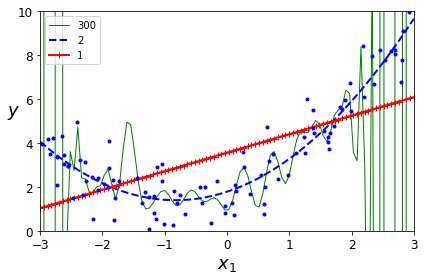

## 과소적합(Underfitting)의 경우

In [ ]:
####################################################################################################
# 모델의 학습과정에서, 학습 데이터와 테스트 데이터가 매 에포크마다 갖는 에러의 값을 순차적으로 보여줌.
#+본 코드는 과제 수행 시 유용하게 재활용해보시기 바랍니다.
####################################################################################################
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

## 과대적합(Overfitting)의 경우

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),  # 10차항까지 모델에 포함하는 경우
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])                       # not shown
save_fig("overfitting_learning_curves_plot")  # not shown
plt.show()                                    # not shown

## 잘 적합된(Proper Fitting) 경우

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),  # 2차항까지 모델에 포함하는 경우
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("properfitting_learning_curves_plot")  # not shown
plt.show()                        # not shown

# Regularized Linear Models (규제가 있는 선형 모형)

- 모델을 규제함으로써 과대적합(overfitting)을 감소시킬 수 있음.
- 다항 회귀 모델의 경우, 다항식의 차수를 감소시키는 방법으로 규제할 수 있음.
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 모델을 규제함.

## Ridge Regression (릿지 회귀)
모델의 가중치를 가능한 한 작게 만드는 방향으로 모델을 규제하는 방법.

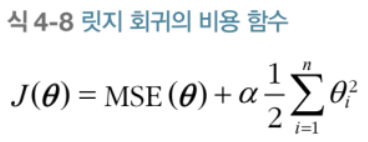

$Ridge Regression's Loss = MSE(θ) + L_2 Loss$<br>
두 개의 항을 모두 작아지도록 노력 --> 각각의 $θ(θ_i)$가 유지되면서 작아짐. <br>

In [ ]:
# 모델의 학습용 데이터 생성
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

##### sklearn.linear_model.Ridge
class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)<br>
Linear least squares with l2 regularization.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge<br>

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
####################################################################################################
# 모델의 학습과정에서, 학습 데이터와 테스트 데이터가 매 에포크마다 갖는 에러의 값을 순차적으로 보여줌.
#+본 코드는 과제 수행 시 유용하게 재활용해보시기 바랍니다.
####################################################################################################
from sklearn.preprocessing import StandardScaler
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()  # alpha = 0 --> No Regularization
        if polynomial:                                                                  # alpha > 0 --> Ridge Regularization
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

In [ ]:
# alpha의 증가에 따라, 규제(regularization)가 강화됨
# alpha=1e-05에서 다차항이 유지되면서 진폭이 감소되는 것을 확인 (라쏘 모델과 비교)
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)   # 좌측 모델은 다차항(10차)이 포함되지 않음
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)  # 우측 모델은 다차항(10차)이 포함됨

save_fig("ridge_regression_plot")
plt.show()

In [ ]:
# SGDRegressor에 "l2" 규제를 적용하면 Ridge Regression이 됨
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

## Lasso Regression (라쏘 회귀)
상대적으로 덜 중요한 특성을 제거하는 방향으로 모델을 규제하는 방법.

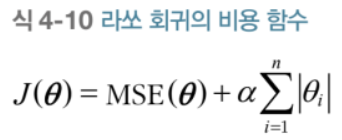

$Lasso Regression's Loss = MSE(θ) + L_1 Loss$<br>
두 개의 항이 모두 작아지도록 학습 진행 --> 각각의  θ(θ𝑖) 중 일부가 먼저 0으로 작아짐.<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso

In [ ]:
# alpha=1e-07에서 일부 다차항이 없어지면서 진폭이 감소 (릿지 모델과 비교)
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)   # 좌측 모델은 다차항(10차)이 포함되지 않음
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)  # 우측 모델은 다차항(10차)이 포함됨

save_fig("lasso_regression_plot")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
# SGDRegressor에 "l1" 규제를 적용하면 Lasso Regression이 됨.

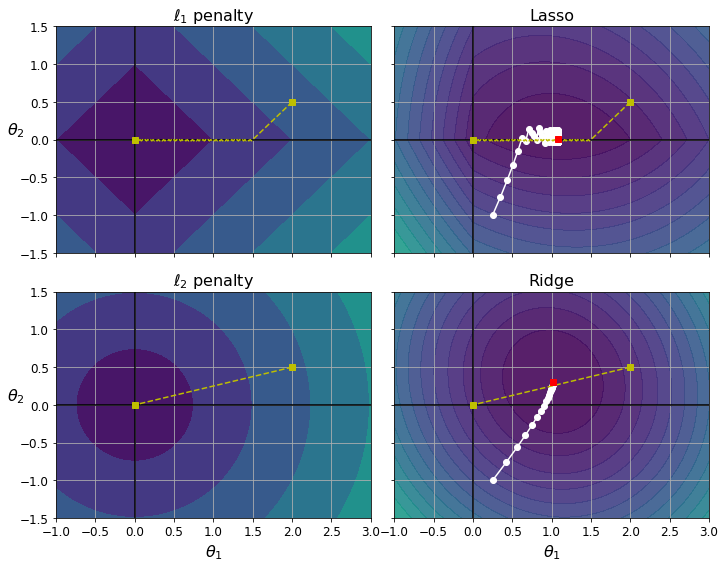

$L_1 Loss: |θ_1| + |θ_2| = c$<br>
$L_2 Loss: θ_1^2 + θ_2^2 = c$<br>

## Elastic Net (엘라스틱넷)

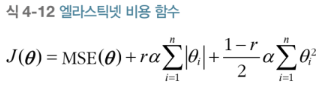

$Elastic Net's Loss = MSE(θ) + (r) L_1 Loss + (1-r) L_2 Loss$

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # l1_ratio = r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

<b>So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?</b><br>
It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Kindle Locations 3115-3119). O'Reilly Media. Kindle Edition. 

- Regularized Regression > Linear Regression<br>
- Ridge: default<br>
- Lasso / Elastic Net: Only a few features are useful<br>
- Elastic Net > Lasso<br>

## Early Stopping (조기 종료)

검증 에러가 최솟값에 도달했을 때 훈련을 중지시키는 규제 방법

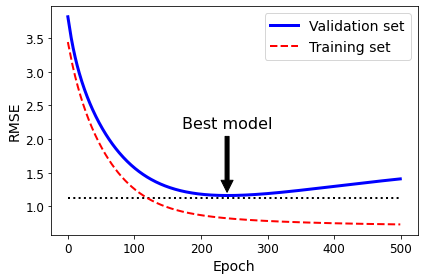

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None  # 최적의 모델일 때 에포크 값
best_model = None  # 최적의 모델을 저장하는 객체
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    # Validation Error가 최소인 지점을 별도로 저장. 저장 대상: 에러값, 에포크, 모델
    if val_error < minimum_val_error:  # 에러 최솟값을 저장해두었다가, 에포크마다 기존값보다 작은 에러인 경우 에포크와 모델을 교체
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

##### deepcopy
https://docs.python.org/3/library/copy.html 또는<br>
https://docs.python.org/ko/3/library/copy.html<br>

Create the graph:

In [ ]:
minimum_val_error, best_epoch, best_model

# Logistic Regression (로지스틱 회귀)

## Estimating Probabilities (확률 추정)

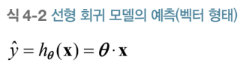

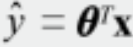

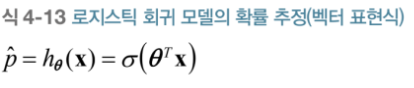

<center>σ(): sigmoid function (시그모이드 함수)</center>

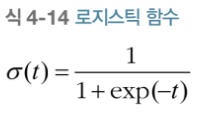

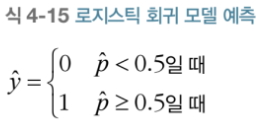

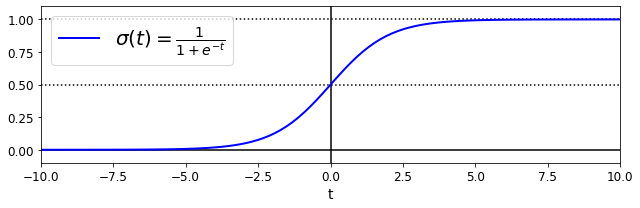

## Decision Boundaries (결정 경계)

In [ ]:
# 붓꽃 데이터를 로드.
# 세 품종(Iris-Setosa, Iris-Versicolor, Iris-Virginica)의 꽃잎(petal)의 너비(width)와 길이(length) 데이터 포함
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

In [ ]:
type(iris)

https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch

In [ ]:
print(iris.DESCR)

In [ ]:
# 꽃잎의 너비만으로 품종을 (Virginica와 기타로) 2진분류하는 분류기를 생성하기 위한 데이터 생성.
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [ ]:
# X, iris["target"]의 값을 변환한 y값을 확인.
np.c_[X, iris["target"], y]

In [ ]:
# 로지스틱 회귀 모형을 학습: L2 규제 적용(default)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)  # ‘lbfgs’ - [‘l2’, ‘none’]
log_reg.fit(X, y)

##### sklearn.linear_model.LogisticRegression
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)<br>
Logistic Regression (aka logit, MaxEnt) classifier.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression<br>

In [ ]:
# 정확도 계산.
log_reg.score(X, y)  # score(X, y[, sample_weight]): Return the mean accuracy on the given test data and labels.

In [ ]:
# 학습된 모델로 X값에 따른 y예측값을 plot
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 2차원 배열
y_proba = log_reg.predict_proba(X_new)  # predict_proba(X): Probability estimates.
                                        # predict(X): Predict class labels for samples in X.
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()

In [ ]:
X_new  # X는 2차원 배열이기를 기대하기 때문

In [ ]:
y==1

In [ ]:
# Decision Boundary (결정경계) 계산
# X_new의 값이 오름차순이므로, 0.5를 넘어서는 첫번째 인덱스의 값을 읽으면 클래스 '1'에 해당하는 X_new의 최솟값을 구할 수 있음.
X_new[y_proba[:, 1] >= 0.5][0]

In [ ]:
# X_new의 값이 오름차순으로 정렬되지 않았다면, 아래와 같이 계산.
import numpy as np
i = np.argmax(y_proba[:, 1] >= 0.5)
X_new[i]

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]    # First value whose probability is greater than or equal to 0.5

####################################################################################################
# 이하의 코드는 이미지를 표시하기 위한 목적으로 작성되었으며, 무시하고 넘어가도 됩니다.
####################################################################################################
plt.figure(figsize=(16, 6))
# 실제 데이터 표시
plt.plot(X[y==0], y[y==0], "bs")    # Not Iris Virginica: 하단의 파란색 사각형
plt.plot(X[y==1], y[y==1], "g^")    # Iris Virginica: 상단의 녹색 삼각형
# 예측값(곡선) 표시
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)   # 결정 경계(수직 점선)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")      # Iris-Virginica (녹색 실선)
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica") # Not Iris-Virginica (파란색 점선)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center") 
# 화살표 표시
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')  # 파란색 화살표(결정경계 우측)
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')   # 녹색 화살표(결정경계 좌측)
# 레이블 표시
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
# 축 설정
plt.axis([0, 3, -0.02, 1.02])
# 그림 저장
save_fig("logistic_regression_plot")
plt.show()

##### matplotlib.pyplot.axis
matplotlib.pyplot.axis(\*args, emit=True, \*\*kwargs)<br>
Convenience method to get or set some axis properties.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html?highlight=axis#matplotlib.pyplot.axis<br>

##### matplotlib.pyplot.arrow
matplotlib.pyplot.arrow(x, y, dx, dy, **kwargs)<br>
Add an arrow to the Axes.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html#matplotlib.pyplot.arrow<br>

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

두개의 특성을 적용하는 경우: 결정경계는 선형으로 표현됨.

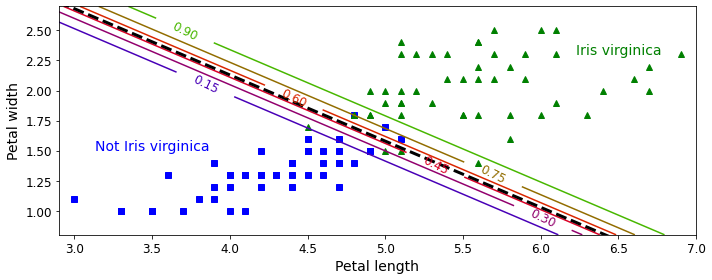

## Softmax Regression (소프트맥스 회귀)

이진 분류기인 로지스틱 회귀 모델 여러 개를 훈련시켜 다중 클래스를 분류할 수 있는 분류기로 일반화하는 방법.

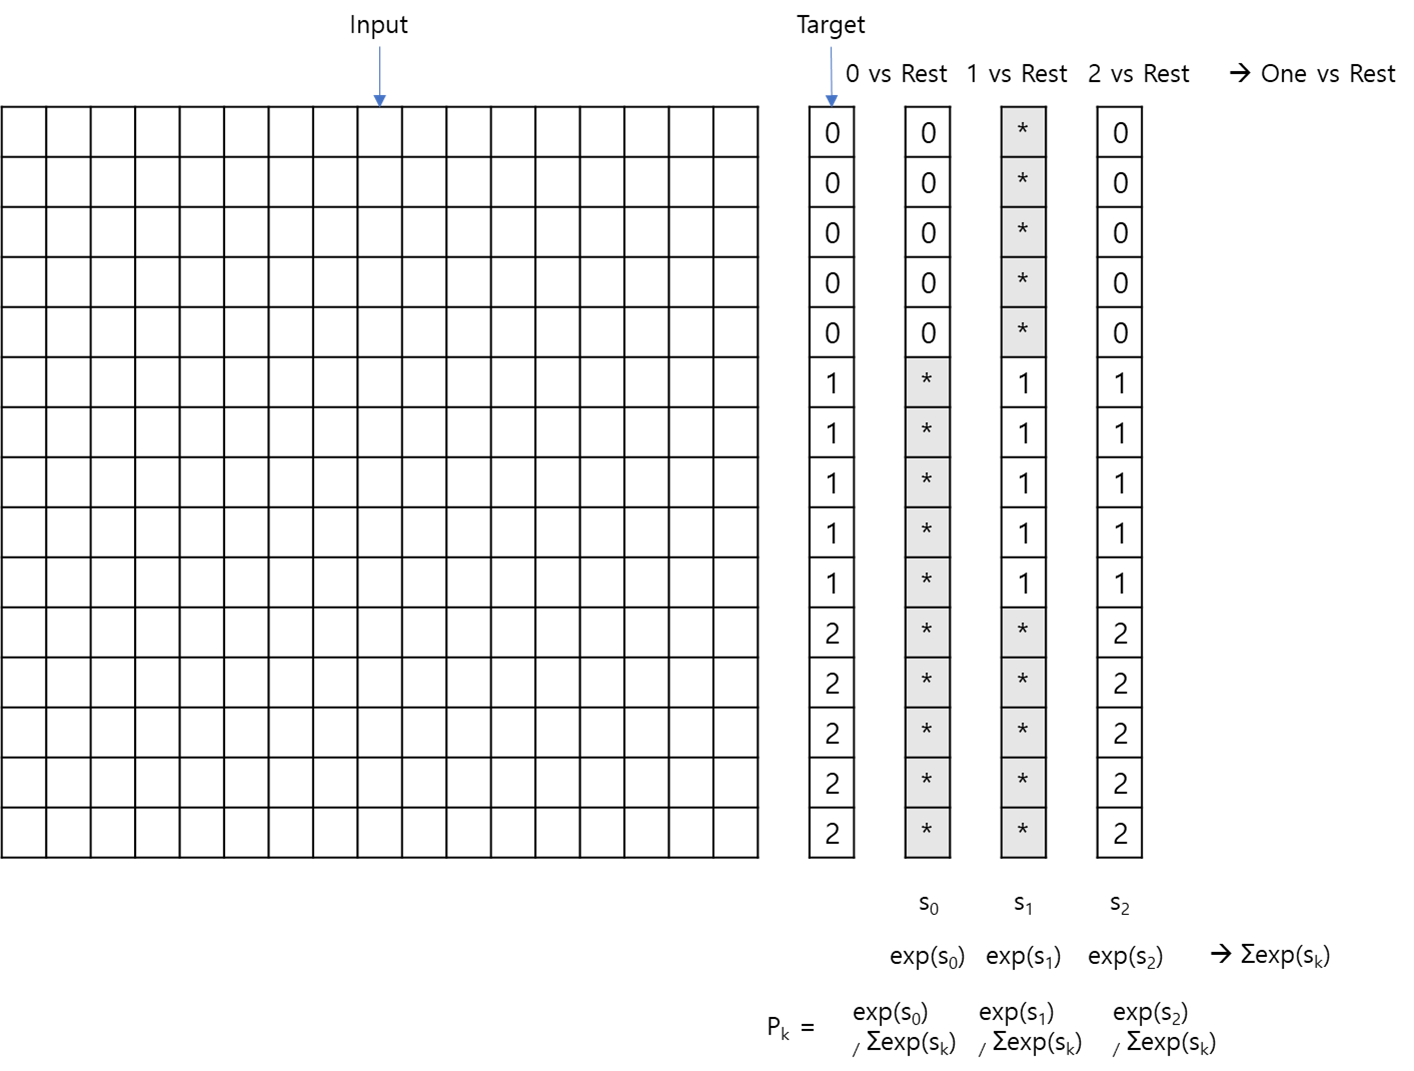

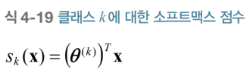

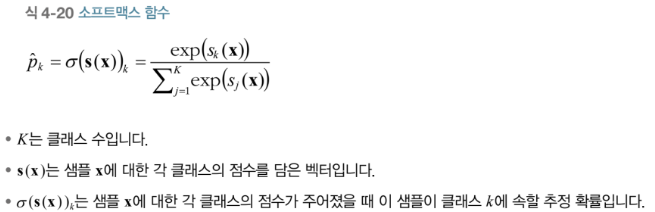

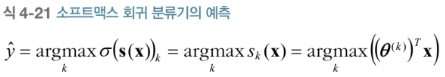

In [ ]:
# 소프트맥스 회귀(softmax regression) 또는 다항 로지스틱 회귀(multinomial logistic regression))
X = iris["data"][:, (2, 3)]  # petal length(꽃잎 길이), petal width(꽃잎 너비)
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
X

##### sklearn.linear_model.LogisticRegression
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)<br>
Logistic Regression (aka logit, MaxEnt) classifier.<br>
<b>C: float, default=1.0</b><br>
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression<br>

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

# Homework

## Exercise 1. to 11.

## 모델 학습

### 데이터 전처리 후 교차검증을 통해 와인 품질 분류기에 대한 최적의 하이퍼파라미터값을 설정하십시오.

1. 데이터는 pandas의 read_csv() 메서드를 이용하여 winequality-red.csv 파일로부터 읽으면 됩니다.
2. 데이터 전처리 시 PolyFeatures(2차항까지) StandardScaler를 사용하십시오.
3. LogisticRegression을 이용해 와인의 품질을 예측하는 모델 객체를 생성하십시오.
4. GridSearchCV를 사용하여 교차검증을 하되, 최적의 모델을 찾기 위해 penalty, C의 값을 탐색하십시오.
5. 여기서 penalty는 L1, L2, elasticnet을 사용하고, elasticnet에 대해서는 l1_ratio 값을 함께 탐색해야 합니다.
6. 위의 세 가지 규제를 모두 수용하기 위해서 solver는 'saga'를 선택해야 하며, tol=0.001로 설정합니다.
7. 좀 더 높은 성능의 하이퍼파라미터를 찾기 위해 반복적으로 탐색을 수행하도록 합니다. 이 때, GridSearchCV에 전달할 파라미터를 세분화하여 다시 교차검증을 수행하되, 별도의 코드셀을 사용하도록 합니다.